# Explainable Artificial Intelligence (XAI)

<br>

We will be using the dataset [Airline Passenger Satisfaction](https://www.kaggle.com/datasets/nilanjansamanta1210/airline-passenger-satisfaction) from Kaggle. The dataset contains information about passengers' satisfaction with the airline service. The goal is to predict whether a passenger is satisfied or not based on the features provided.

## Data Loading and Preprocessing

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import kagglehub
import random
import utils
import os

In [2]:
dataset_path = "data/airline_passenger_satisfaction.csv"

if not os.path.exists(dataset_path):
        print("Downloading dataset...")
        path = kagglehub.dataset_download("nilanjansamanta1210/airline-passenger-satisfaction")
        downloaded_file = os.path.join(path, "airline_passenger_satisfaction.csv")
        if os.path.exists(downloaded_file):
            os.rename(downloaded_file, dataset_path)
        else:
            raise FileNotFoundError("The dataset was not downloaded properly. Please check the Kaggle dataset.")

df = pd.read_csv(dataset_path)
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [3]:
df = utils.pre_process_df(df, drop_correlated=True)
df

,Age,Class,Flight Distance,Departure and Arrival Time Convenience,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,...,In-flight Entertainment,Baggage Handling,Satisfaction,Total Delay,Female,Male,First-time,Returning,Business,Personal
0,48,2,821,3,4,3,3,3,5,2,...,5,5,0,7,0,1,1,0,1,0
1,35,2,821,2,3,5,2,5,4,5,...,5,5,1,65,1,0,0,1,1,0
2,41,2,853,4,4,5,4,3,5,3,...,3,3,1,0,0,1,0,1,1,0
3,50,2,1905,2,3,4,2,5,5,5,...,5,5,1,0,0,1,0,1,1,0
4,49,2,3470,3,3,5,3,3,4,4,...,3,3,1,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,28,1,447,4,4,4,2,5,1,4,...,4,4,0,5,0,1,0,1,0,1
129876,41,1,308,5,5,3,4,5,2,5,...,2,5,0,0,0,1,0,1,0,1
129877,42,1,337,5,4,2,1,3,3,4,...,3,5,0,20,0,1,0,1,0,1
129878,50,1,337,4,3,4,1,4,4,5,...,3,5,1,53,0,1,0,1,0,1


In [4]:
# Check column types
non_numeric_columns = []
cols_w_missing_values = []

for col in df.columns:
    if not pd.api.types.is_integer_dtype(df[col]):
        non_numeric_columns.append((col, df[col].dtype))
    if df[col].isnull().sum() > 0:
        cols_w_missing_values.append(col)

# Print result
if len(non_numeric_columns) == 0:
    print("All columns are int or float.\n")
else:
    print("There are columns that are not int:")
    for col, dtype in non_numeric_columns:
        print(f"Column: {col}, Type: {dtype}")


if len(cols_w_missing_values) == 0:
    print("No columns have missing values.")
else:
    print("Columns with missing values:")
    for col in cols_w_missing_values:
        print(f"Column: {col}")

All columns are int or float.

No columns have missing values.


## Data Analysis

We will analyze the data to understand the relationships between the features and the target variable. We will also check for class imbalance and feature distributions.

<br>

### Correlation Analysis

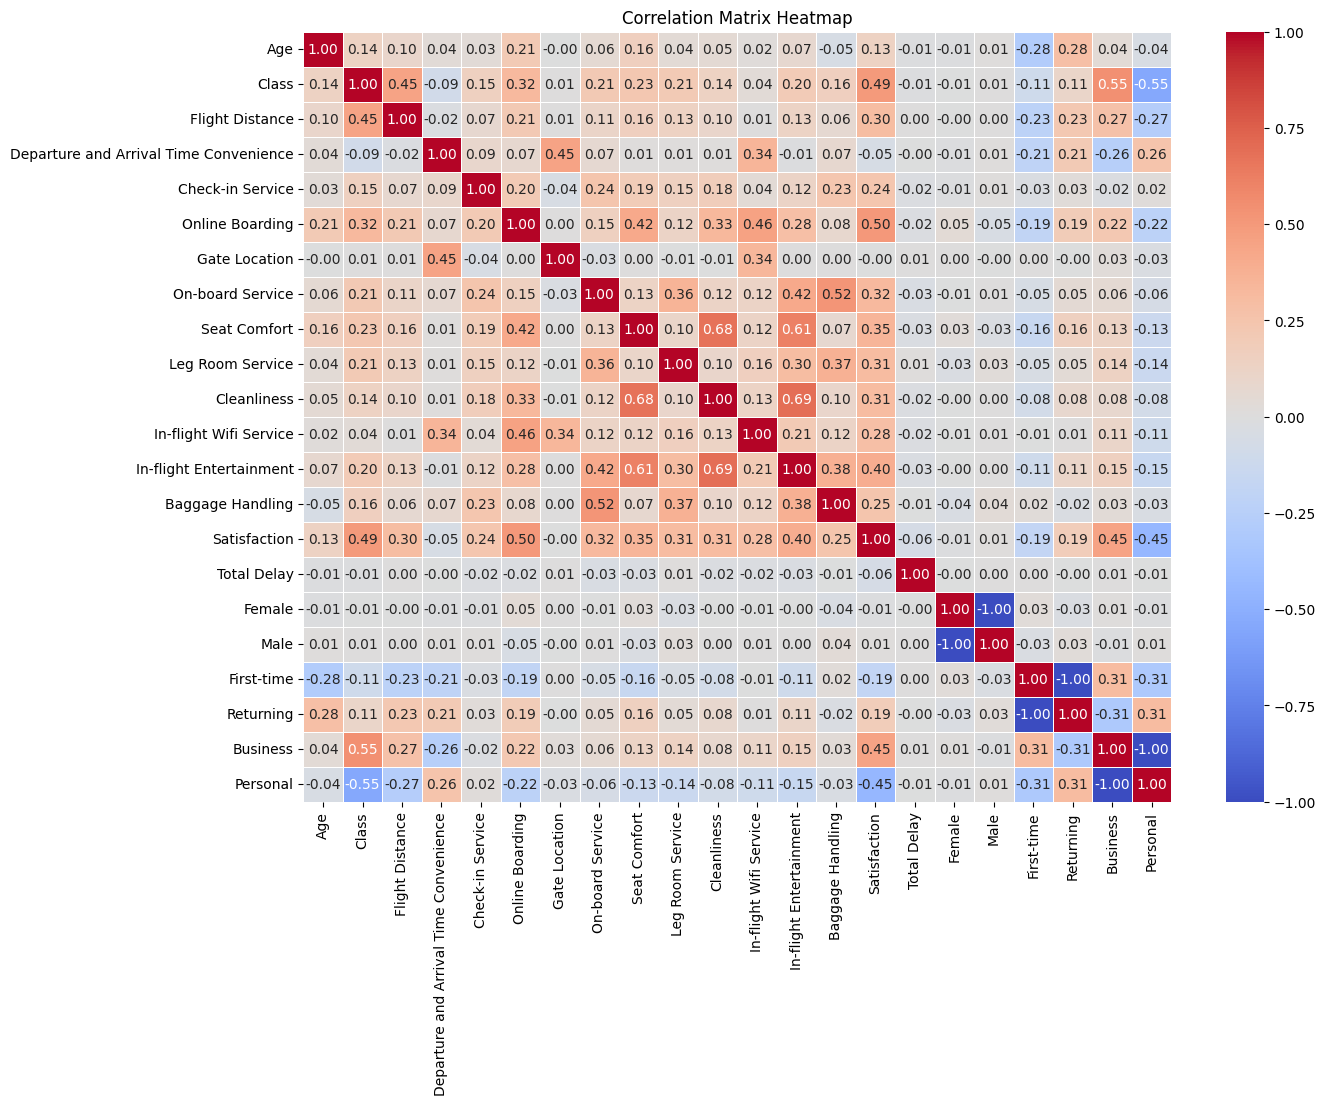

In [5]:
utils.visualize_correlation(df)

Accuracy of the model having the highly correlated features **Dropped** vs. **Not Dropped**:

<br>

| Model             | Data Split                | Not Dropped (%) | Dropped (%)  |
|-------------------|---------------------------|-----------------|--------------|
| **Decision Tree** | Holdout Accuracy          | 94.649          | 94.387       |
|                   | Cross-Validation Accuracy | 94.675          | 94.171       |
| **Random Forest** | Holdout Accuracy          | 96.324          | 96.089       |
|                   | Cross-Validation Accuracy | 96.296          | 96.016       |

<br>
<br>

The accuracy results suggest that removing highly correlated features has minimal impact on model performance, indicating that these features do not significantly contribute to predictive accuracy. Therefore, prioritizing simplicity and interpretability, we remove these features as the performance trade-off is negligible.

Suggested features to remove: 'Baggage Handling', 'Seat Comfort', 'Food and Drink', 'In-flight Service', 'Ease of Online Booking', 'Cleanliness'

Removed features: 'Ease of Online Booking', 'Food and Drink', 'In-flight Service'



## Visualization of the dataset
To help visualize the data, we used PCA to reduce the dimensionality of the data to 2D

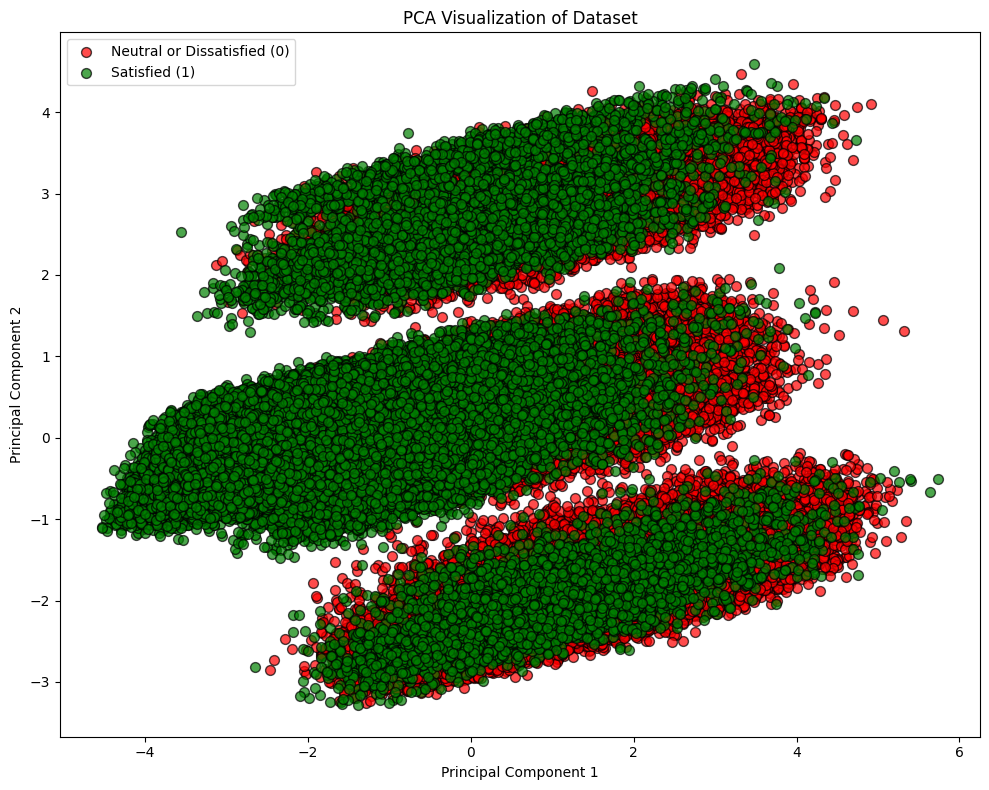

In [6]:
X = df.drop(columns=["Satisfaction"])
y = df["Satisfaction"]

utils.visualize_data_with_pca(X, y)

### Class Imbalance

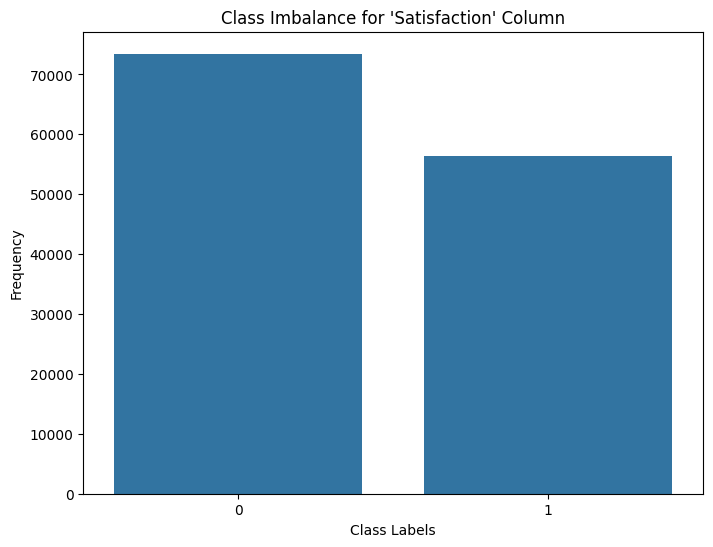

In [7]:
# Verify class imbalance of the Target

utils.visualize_class_imbalance(df)

As we observe, there is an imbalance in the classes. We will evaluate, further ahead, whether applying SMOTE improves the model's performance.

### Feature distribution

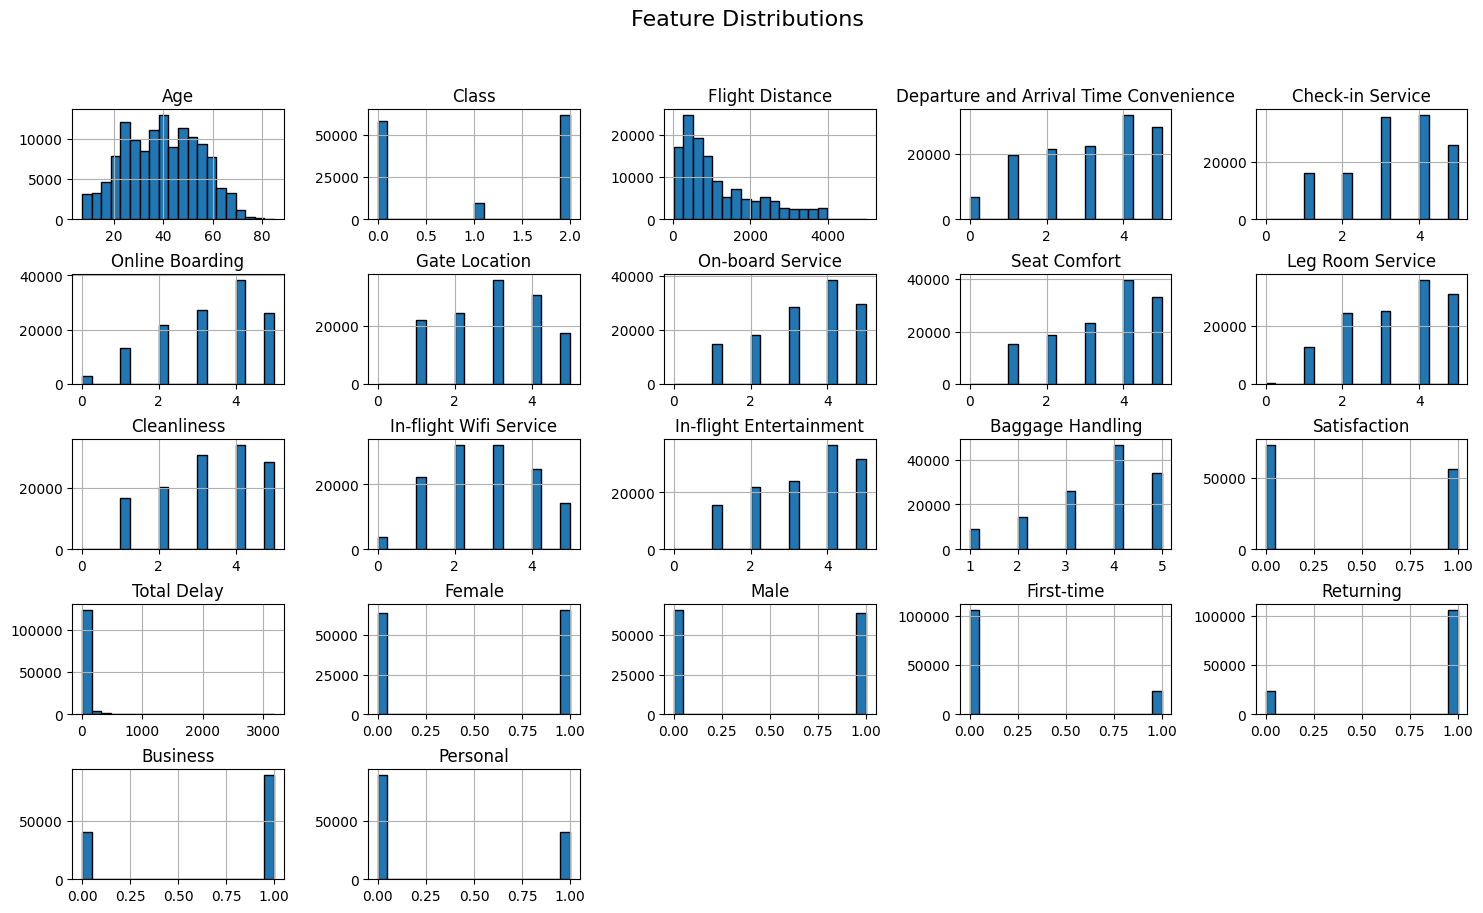

In [8]:
utils.visualize_feature_distributions(df)

## Simple Classifications

We will start by using a glass box and a black box model to classify the data. We chose a Decision Tree and a Random Forest as the models, respectively. We will analyze the performance of the models and then apply XAI techniques to explain the predictions.

Here we checked if applying **SMOTE** yielded better predictions:
<br>

| Model             | Data Split                | Without SMOTE (%)  | With SMOTE (%) |
|-------------------|---------------------------|--------------------|----------------|
| **Decision Tree** | Holdout Accuracy          | 94.649             | 94.476         |
|                   | Cross-Validation Accuracy | 94.675             | 94.479         |
| **Random Forest** | Holdout Accuracy          | 96.324             | 96.185         |
|                   | Cross-Validation Accuracy | 96.296             | 96.245         |

<br>
<br>

Since the accuracy without SMOTE is marginally higher, we decided against using SMOTE.

In [9]:
apply_smote = False


### Decision Tree

The decision tree is a glass box model that is easy to interpret. We will use it to classify the data and then apply XAI techniques to explain the predictions.

In [10]:
tree = DecisionTreeClassifier(max_depth=10,random_state=42)

accuracy = utils.holdout_accuracy(X, y, tree, test_size=0.2, apply_smote=apply_smote)
cv_score = utils.cross_validation_acc(X, y, tree, cv_fold=10, apply_smote=apply_smote)

print(f"Holdout Accuracy: {accuracy}%\nCross-Validation Accuracy: {cv_score}%")

Holdout Accuracy: 94.672%
Cross-Validation Accuracy: 94.53%


<br>

| Model             | Data Split                | Without max_depth (%) | With max_depth (%) |
|-------------------|---------------------------|-----------------------|--------------------|
| **Decision Tree** | Holdout Accuracy          | 94.387                | 94.672             |
|                   | Cross-Validation Accuracy | 94.171                | 94.53              |


<br>
<br>


### Random Forest

The random forest is a black box model that is more complex than the decision tree. Like with the decision tree, we will classify the data and then apply XAI techniques to explain the predictions.

In [11]:
forest = RandomForestClassifier(random_state=42)

accuracy = utils.holdout_accuracy(X, y, forest, test_size=0.2, apply_smote=apply_smote)
cv_score = utils.cross_validation_acc(X, y, forest, cv_fold=10, apply_smote=apply_smote)

print(f"Holdout Accuracy: {accuracy}%\nCross-Validation Accuracy: {cv_score}%")

Holdout Accuracy: 96.089%
Cross-Validation Accuracy: 96.016%


## Explainable AI Techniques

<br>

### Glass Box Explainability

Tree Depth: 10 - Number of Leaves: 294 - Number of Nodes: 587 - Internal Nodes: 293 - Leaf Nodes: 294


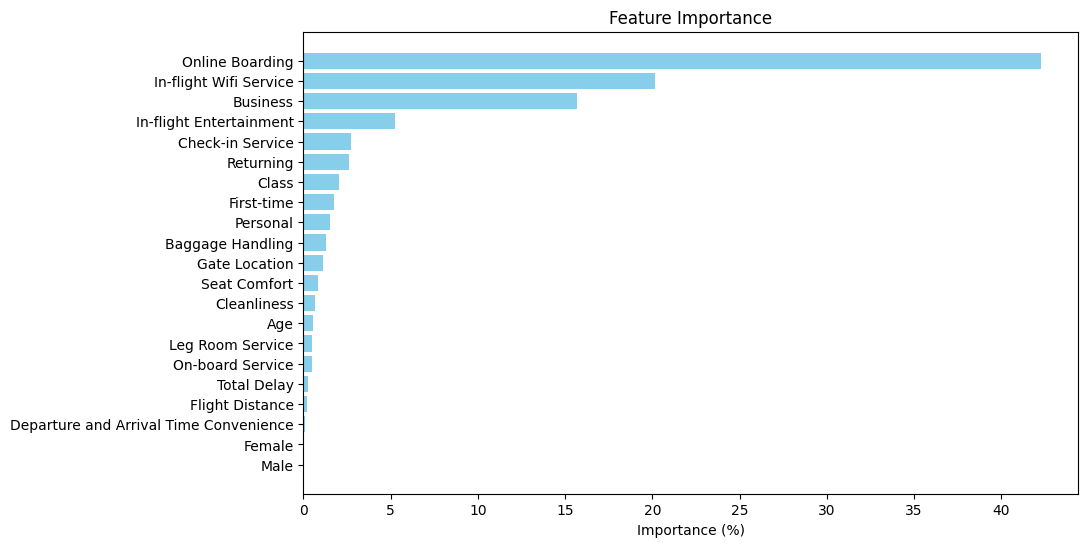

In [12]:
utils.analyze_tree_complexity(X,y, tree=tree)

### Black Box Explainability

<br>

#### **Simplification-based technique**
**Surrogate models-** The idea is to train a simpler, more interpretable model (such as a decision tree or linear regression) to approximate the decisions of a complex model. Surrogate models help to understand how the original model makes its decisions without needing to understand its entire internal behavior.

**Rule Extraction-** The idea is to extract a set of rules from a complex model, such as a Random Forest, to make it more interpretable.

In [13]:
utils.apply_surrogate_models_xai(X,y,forest)

Surrogate Model Accuracy: 88.293%


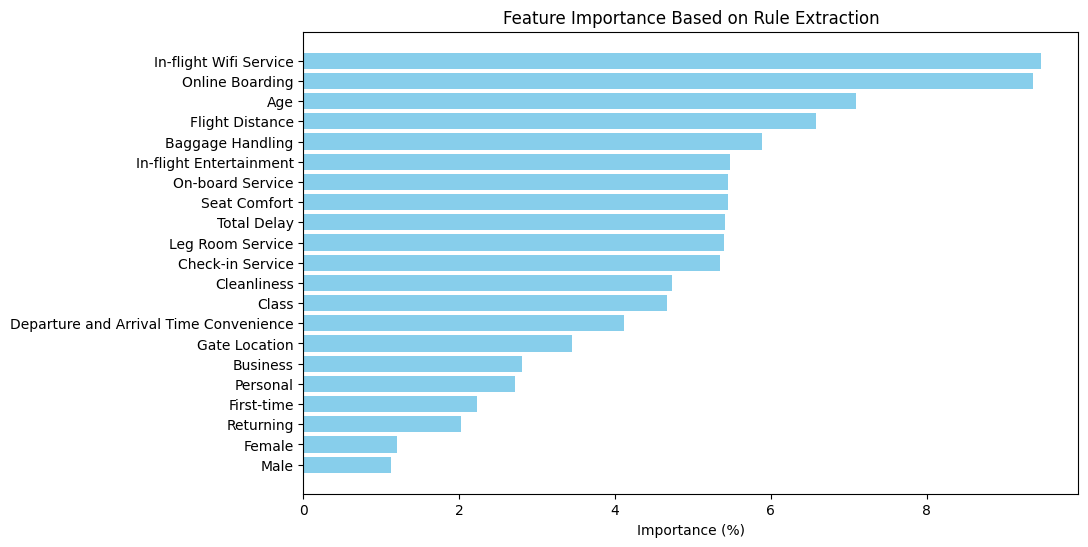

In [14]:
feature_summary, pruned_rules_df = utils.apply_rule_extraction_xai(X,y,forest)
utils.plot_feature_importance_from_rules(feature_summary)

In [15]:
pruned_rules_df

,rule,predicted_class,coverage
0,Online Boarding <= 3.50 AND Check-in Service <...,1,11
1,Online Boarding <= 3.50 AND Check-in Service <...,1,42
2,Online Boarding <= 3.50 AND Check-in Service <...,1,38
3,Online Boarding <= 3.50 AND Check-in Service <...,0,15
4,Online Boarding <= 3.50 AND Check-in Service <...,1,39
...,...,...,...
126232,Leg Room Service > 3.50 AND In-flight Entertai...,1,2200
126233,Leg Room Service > 3.50 AND In-flight Entertai...,1,12
126234,Leg Room Service > 3.50 AND In-flight Entertai...,1,10
126235,Leg Room Service > 3.50 AND In-flight Entertai...,1,77


In [16]:
# utils.evaluate_rule_extraction_accuracy(pruned_rules_df,df)

#### **Feature-based techniques**

- **Permutation Feature Importance-** Measures the importance of a variable by checking how much the model's accuracy drops when the values ​​of that variable are shuffled.
If shuffling greatly reduces accuracy, the variable is important to the model.

- **LIME-** Focuses on explaining how the model makes decisions for an individual sample, showing the impact of each feature on the prediction for that instance, while the surrogate model tries to understand the global behavior of the model.

- **SHAP-** Calculates the contribution of each feature to the model's prediction. It considers all possible combinations of features (subsets) to ensure a fair distribution of the "responsibility" of each feature in the prediction.

In [17]:
# To use the same samples in LIME and in SHAP 
from sklearn.model_selection import train_test_split

# Split data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


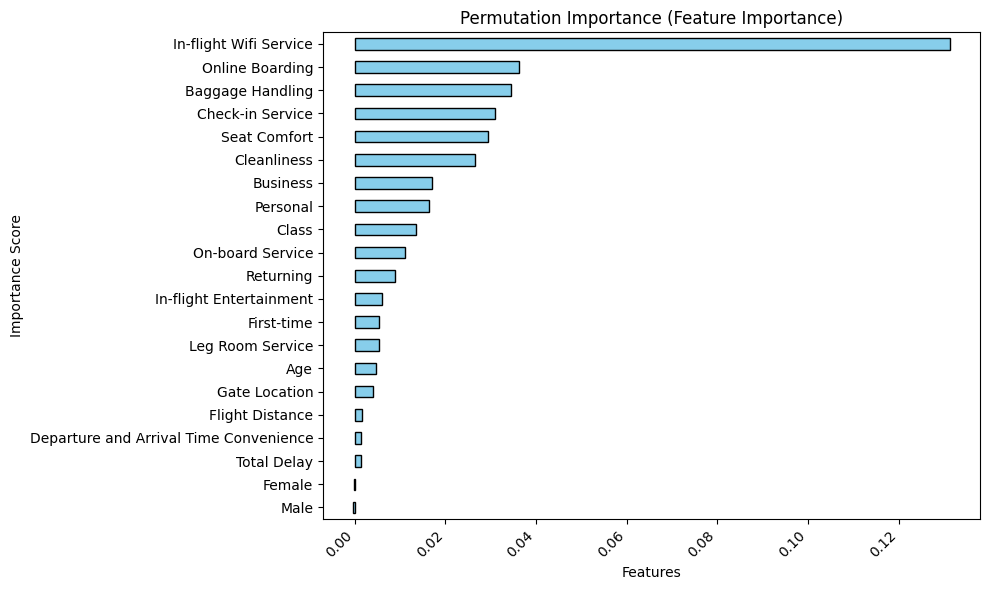

In [18]:
utils.apply_permutation_importance_xai(X_train, X_test, y_train, y_test, forest)

conclusoes

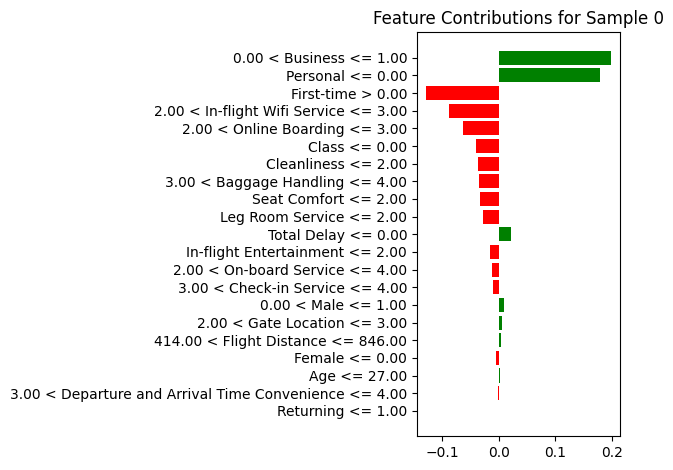

In [19]:
utils.apply_lime_xai(X_train, X_test, y_train, y_test, forest,0)

For the sample with index 0, the features `Business`, `Personal` e `Total Delay` were the ones that contributed positively to the model's prediction, meaning they increased the probability of the model predicting the assigned class.
Features such as `In-flight Wifi Service`, `Online Boarding`, e `Baggage Handling` also negatively influenced the model, but with smaller magnitudes compared to `Business` e `Personal`.

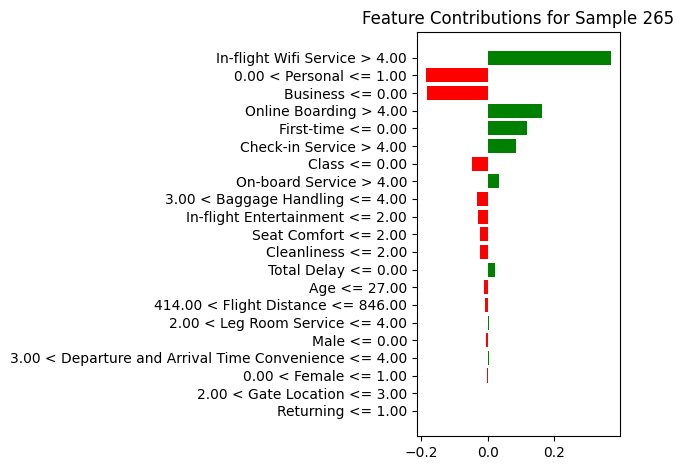

In [20]:
utils.apply_lime_xai(X_train, X_test, y_train, y_test, forest, 265)

Fidelity Score (Mean Absolute Error): 0.0000

Instance 1:
Model Prediction: 0.2100
SHAP Sum + Base Value: 0.2100
Local Accuracy Error: 0.0000

Instance 2:
Model Prediction: 0.9900
SHAP Sum + Base Value: 0.9900
Local Accuracy Error: 0.0000

Instance 3:
Model Prediction: 0.0100
SHAP Sum + Base Value: 0.0100
Local Accuracy Error: 0.0000


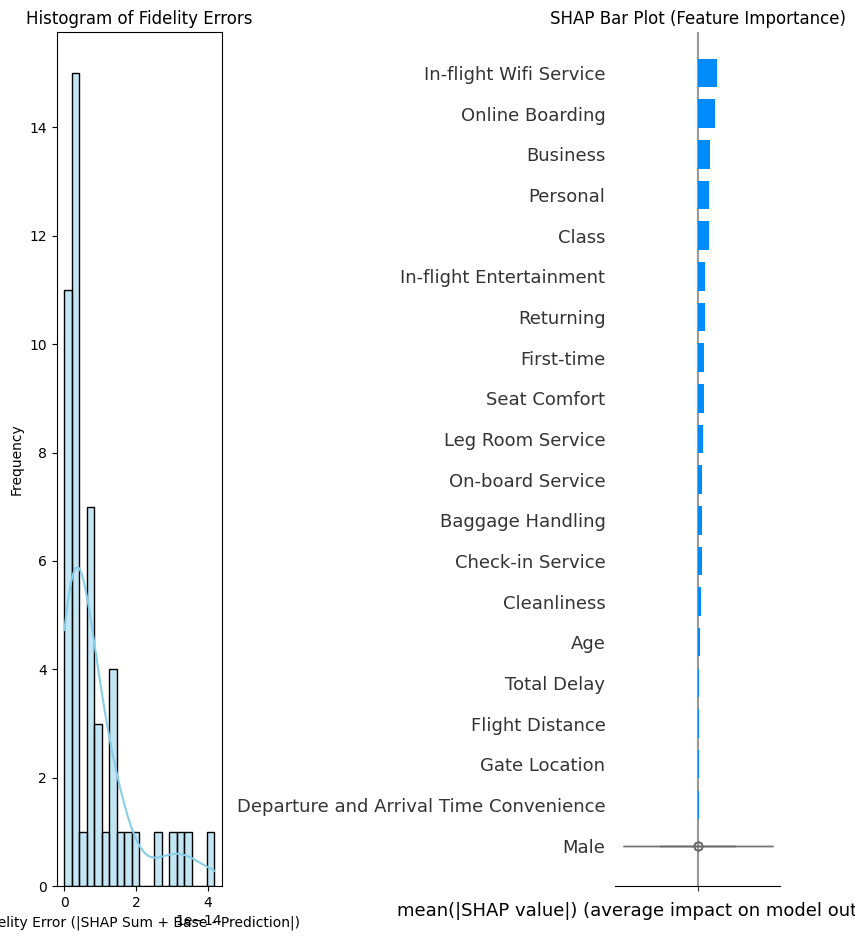

In [21]:
# diminuir subset_size
utils.apply_shap_xai(X_train, X_test, y_train, y_test, forest)

conclusoes

#### **Example-based techniques**

The goal is to use examples to explain or justify model predictions, as this approach helps users understand predictions through relatable examples.

Next, we show 2 examples using the Anchors Technique:

In [22]:
high_cov_idx, low_cov_idx = utils.find_instances_by_coverage(X_train, X_test, y_train, y_test, forest, threshold=0.85)

Fitting the explainer...
Explainer fitted.
25976


KeyboardInterrupt: 

In [ ]:
explanation_high = utils.generate_anchor_rule(X, y, forest, high_cov_idx)
utils.evaluate_explanation(explanation_high, instance_index=high_cov_idx, target_value='Satisfied')

In [ ]:
explanation_boundary = utils.generate_anchor_rule(X, y, forest, low_cov_idx)
utils.evaluate_explanation(explanation_boundary, instance_index=low_cov_idx, target_value='Neutral or Dissatisfied')

conclusoes

#### **Evaluate explanations generated by SHAP and LIME**

## Conclusion